<a href="https://colab.research.google.com/github/Ragavendhra-Ramanan/Ml_Course/blob/main/LinearRegression_NormalEquation_FromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

In [22]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-24 10:36:45--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2023-09-24 10:36:45 (18.7 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



* In this homework, we will use the California Housing Prices.
* The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

#**Loading Data**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
df=pd.read_csv('housing.csv')

In [25]:
df.shape

(20640, 10)

In [26]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **EDA**

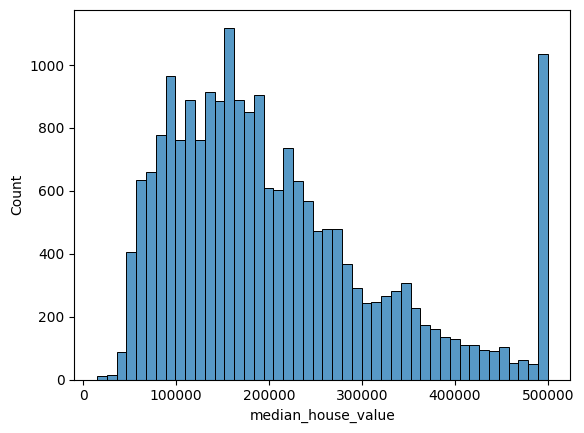

In [27]:
sns.histplot(data=df,x='median_house_value')
plt.show()

* The data is skewed towards right .Hence taking Log Transformation for the same .

In [28]:
df['log_median_house_value']=np.log1p(df['median_house_value'].values)

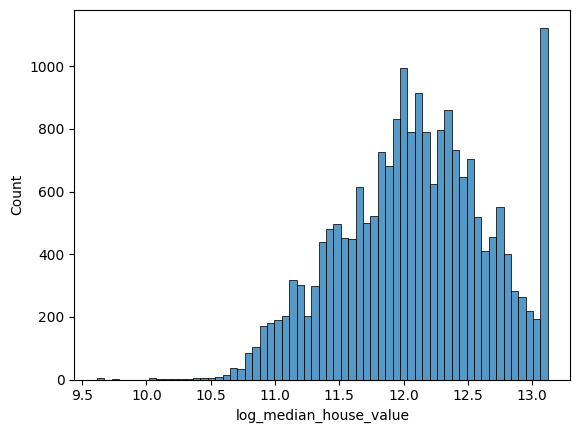

In [29]:
sns.histplot(data=df,x='log_median_house_value')
plt.show()

* Now the median house value appears slightly close to normal distribution.

# **Preparing Dataset**

* Selecting only subset of columns

In [30]:
features=['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'log_median_house_value']
rows_filter=df['ocean_proximity'].isin(('<1H OCEAN','INLAND'))

In [31]:
data=df[rows_filter][features]

In [32]:
data.shape

(15687, 9)

# **Check for Missing Values**

01. There's one feature with missing values. What is it?



In [33]:
data.isnull().sum()

latitude                    0
longitude                   0
housing_median_age          0
total_rooms                 0
total_bedrooms            157
population                  0
households                  0
median_income               0
log_median_house_value      0
dtype: int64

* total_bedrooms has 157 missing values.

# **Basic Statistic Check**

02 .What's the median (50% percentile) for variable 'population'?



In [34]:
data.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,log_median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,35.467307,-119.217442,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,12.010342
std,2.066387,1.780380,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,0.564962
min,32.610000,-124.140000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,9.615805
25%,33.940000,-121.070000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,11.619994
50%,34.160000,-118.370000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,12.025156
75%,37.340000,-117.990000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,12.392971
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,13.122367


* The median (50% percentile) for variable 'population' - 1195 .



# **DataSet Preparation**

* Prepare and split the dataset
* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [35]:
n=len(data)
n_train=int(0.6*n)
n_val=int(0.2*n)
n_test=n-(n_train+n_val)
print("Train Samples",n_train)
print("Validation Samples",n_val)
print("Test Samples",n_test)

Train Samples 9412
Validation Samples 3137
Test Samples 3138


In [36]:
np.random.seed(42)
idx=np.arange(n)
np.random.shuffle(idx)

In [37]:
X=data.drop('log_median_house_value',axis=1)
Y=data['log_median_house_value']

In [38]:
x_train=X.iloc[idx[:n_train]]
y_train=Y.iloc[idx[:n_train]]
x_val= X.iloc[idx[n_train:n_train+n_val]]
y_val= Y.iloc[idx[n_train:n_train+n_val]]
x_test=X.iloc[idx[n_train+n_val:]]
y_test=Y.iloc[idx[n_train+n_val:]]

In [39]:
print("Train Samples",x_train.shape)
print("Validation Samples",x_val.shape)
print("Test Samples",x_test.shape)

Train Samples (9412, 8)
Validation Samples (3137, 8)
Test Samples (3138, 8)


# **Missing Value Treatment**

Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?


## **Model Defining**

* Here we will use 0 to fill missing values in both train and validation dataset and check its rmse score.
* Defining RMSE metric and Linear Regression Model.

In [53]:
def train_linear_regression(x,y):
  ones=np.ones(shape=x.shape[0])
  x=np.hstack((ones.reshape(-1,1),x))
  XTX=np.dot(x.T,x)
  XTX_inv=np.linalg.inv(XTX)
  w_full=XTX_inv.dot(x.T).dot(y)
  w0=w_full[0]
  w=w_full[1:]
  return w0,w

In [81]:
def rmse(y,y_pred):
  error=y-y_pred
  se=error**2
  sem=se.mean()
  rmse=np.sqrt(sem)
  return round(rmse,2)

## **Filling 0 for missing values**

* As we know that total bedrooms has only null values.

In [82]:
x_train_z = x_train.fillna(0).values
x_val_z = x_val.fillna(0).values

In [83]:
w0,w=train_linear_regression(x_train_z,y_train)

In [84]:
y_pred_train=w0+(x_train_z.dot(w))
y_pred_val = w0+(x_val_z.dot(w))

In [85]:
print("Train RMSE",rmse(y_train,y_pred_train))
print("Val RMSE",rmse(y_val,y_pred_val))

Train RMSE 0.34
Val RMSE 0.34


## **Filling np.mean for missing values**




In [86]:
def mean_impute(x_train,x_val):
  for col in x_train:
    x_train[col]=x_train[col].fillna(x_train[col].mean())
    x_val[col]=x_val[col].fillna(x_val[col].mean())
  return x_train,x_val


In [ ]:
x_train_m,x_val_m=mean_impute(x_train,x_val)

In [88]:
w0,w=train_linear_regression(x_train_m,y_train)
y_pred_train=w0+(x_train_m.dot(w))
y_pred_val = w0+(x_val_m.dot(w))
print("Train RMSE",rmse(y_train,y_pred_train))
print("Val RMSE",rmse(y_val,y_pred_val))

Train RMSE 0.34
Val RMSE 0.34


* Both methods of imputation produces same rmse score.

# **Regularized Linear Regression**

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

In [89]:
def train_reg_linear_regression(x,y,r):
  ones=np.ones(shape=x.shape[0])
  x=np.hstack((ones.reshape(-1,1),x))
  XTX=np.dot(x.T,x)
  XTX= XTX+(r * np.eye(XTX.shape[0]))
  XTX_inv=np.linalg.inv(XTX)
  w_full=XTX_inv.dot(x.T).dot(y)
  w0=w_full[0]
  w=w_full[1:]
  return w0,w

In [92]:
r=[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for val in r:
  w0,w=train_reg_linear_regression(x_train_z,y_train,val)
  y_pred_val=w0+(x_val_z.dot(w))
  print("R value: ",val," Rmse: ",rmse(y_val,y_pred_val))

R value:  0  Rmse:  0.34
R value:  1e-06  Rmse:  0.34
R value:  0.0001  Rmse:  0.34
R value:  0.001  Rmse:  0.34
R value:  0.01  Rmse:  0.34
R value:  0.1  Rmse:  0.34
R value:  1  Rmse:  0.34
R value:  5  Rmse:  0.35
R value:  10  Rmse:  0.35


* 0 as regularization constant is better preforming

# **Different Seed Values**

* Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))
What's the value of std?


In [103]:
def try_diff_seed(seed):
 np.random.seed(seed)
 idx=np.arange(n)
 np.random.shuffle(idx)
 X=data.drop('log_median_house_value',axis=1)
 Y=data['log_median_house_value']
 x_train=X.iloc[idx[:n_train]]
 y_train=Y.iloc[idx[:n_train]]
 x_val= X.iloc[idx[n_train:n_train+n_val]]
 y_val= Y.iloc[idx[n_train:n_train+n_val]]
 x_test=X.iloc[idx[n_train+n_val:]]
 y_test=Y.iloc[idx[n_train+n_val:]]
 return x_train,y_train,x_val,y_val,x_test,y_test

In [104]:
seeds=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
std_values=[]
for val in seeds:
  x_train_s,y_train_s,x_val_s,y_val_s,_,_=try_diff_seed(val)
  x_train_z=x_train_s.fillna(0).values
  x_val_z=x_val_s.fillna(0).values
  w0,w=train_linear_regression(x_train_z,y_train_s)
  y_pred_val=w0+(x_val_z.dot(w))
  rmse_val=rmse(y_val_s,y_pred_val)
  print("Seed: ",val," Rmse: ",rmse_val)
  std_values.append(rmse_val)
print("Standard Deviation",round(np.std(std_values),3))

Seed:  0  Rmse:  0.34
Seed:  1  Rmse:  0.34
Seed:  2  Rmse:  0.34
Seed:  3  Rmse:  0.33
Seed:  4  Rmse:  0.34
Seed:  5  Rmse:  0.34
Seed:  6  Rmse:  0.34
Seed:  7  Rmse:  0.35
Seed:  8  Rmse:  0.35
Seed:  9  Rmse:  0.33
Standard Deviation 0.006


* Standard deviation shows how different the values are.
* If it's low, then all values are approximately the same. If it's high, the values are different.
* If standard deviation of scores is low, then our model is stable.



# **Regularized Linear with Seed 9**

* Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?


In [106]:
x_train_s,y_train_s,_,_,x_test_s,y_test_s=try_diff_seed(9)
x_train_z=x_train_s.fillna(0).values
x_test_z=x_test_s.fillna(0).values
w0,w=train_reg_linear_regression(x_train_z,y_train_s,0.001)
y_pred_val=w0+(x_test_z.dot(w))
rmse_val=rmse(y_test_s,y_pred_val)
print("Rmse: ",rmse_val)

Rmse:  0.33
